# Exploratory Data Analysis and Data Visualization
# Netflix.csv
by Vinodhini Rajamanickam

## import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## read csv

In [3]:
netflix = pd.read_csv("Netflix.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [4]:
netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


## checking for null values

In [6]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

## filling null values

#### using bfill method

In [7]:
netflix["director"] = netflix["director"].fillna(method = "bfill")

In [8]:
netflix["cast"] = netflix["cast"].fillna(method = "bfill")

In [9]:
netflix["date_added"]= pd.to_datetime(netflix["date_added"])
netflix["date_added"] = netflix["date_added"].fillna(method = "bfill") 

In [10]:
netflix.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added        0
release_year      0
rating            7
duration          0
genres            0
description       0
dtype: int64

#### using padding method 

In [11]:
netflix["country"] = netflix["country"].fillna(method = "pad") 

In [12]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          7
duration        0
genres          0
description     0
dtype: int64

#### using mode  

In [13]:
mode_rating = netflix["rating"].mode().values[0]
netflix["rating"] = netflix["rating"].fillna(value = mode_rating)

In [14]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

## printing the dataframe again
as all the null values have been filled.

In [15]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,Vikram Bhatt,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,Jeremy Saulnier,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


# 

# analysing categorical data

## proportion of  movies and TV shows on Netflix

In [16]:
show_type = netflix["type"].unique()
show_type

array(['TV Show', 'Movie'], dtype=object)

In [17]:
a = netflix.type.value_counts()
a

Movie      5377
TV Show    2410
Name: type, dtype: int64

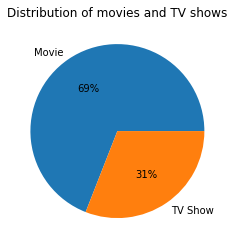

In [18]:
plt.title("Distribution of movies and TV shows")
plt.pie(a,labels = a.index ,autopct = "%1.0f%%")
plt.show()

## top 20 countries with most titles on Netflix

In [19]:
#taking country column aside and counting the number of occurances
countries = netflix[["country"]]
countries = netflix[['country']].value_counts()

#taking top 20 countries 
top_20_countries= countries.head(20).reset_index(name = "number of titles")
top_20_countries


,country,number of titles
0,United States,2740
1,India,993
2,United Kingdom,421
3,Japan,237
4,South Korea,199
5,Canada,188
6,Spain,142
7,France,123
8,Egypt,109
9,Mexico,108


Text(0, 0.5, 'Number of Titles')

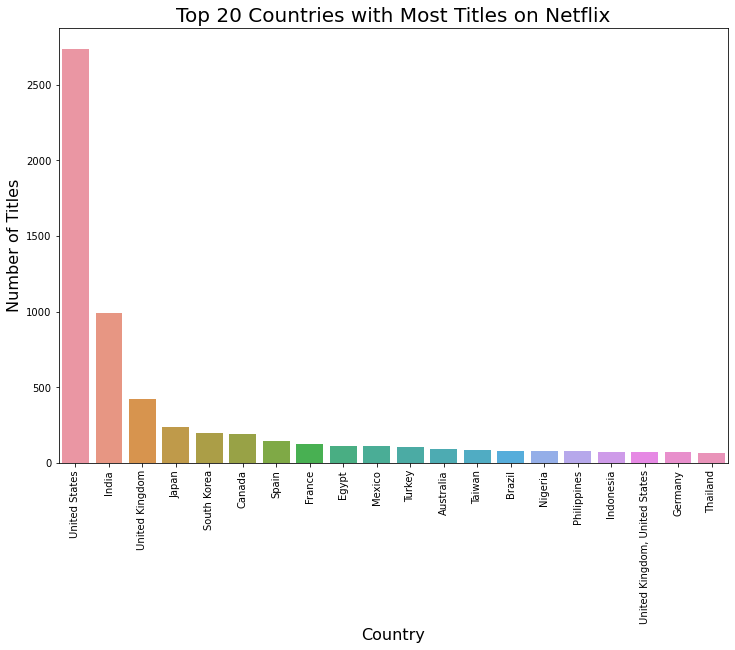

In [20]:
#plotting the graph for top 20 countries
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(data = top_20_countries ,x = "country", y = "number of titles" )
plt.title('Top 20 Countries with Most Titles on Netflix',size = 20)
plt.xlabel('Country',size = 16)
plt.ylabel('Number of Titles',size = 16)

## Top 20 Directors with Most Shows on Netflix

In [21]:
#taking director column aside and counting the number of occurances
directors = netflix[["director"]]
directors = netflix[['director']].value_counts()

#taking top 20 directors 
top_20_directors= directors.head(20).reset_index(name = "number of shows")
top_20_directors


,director,number of shows
0,"Raúl Campos, Jan Suter",27
1,Marcus Raboy,25
2,Cathy Garcia-Molina,22
3,Martin Scorsese,20
4,Youssef Chahine,19
5,Jay Karas,18
6,Riri Riza,15
7,Omoni Oboli,13
8,Chia-Liang Liu,13
9,Jay Chapman,13


Text(0, 0.5, 'Number of Shows')

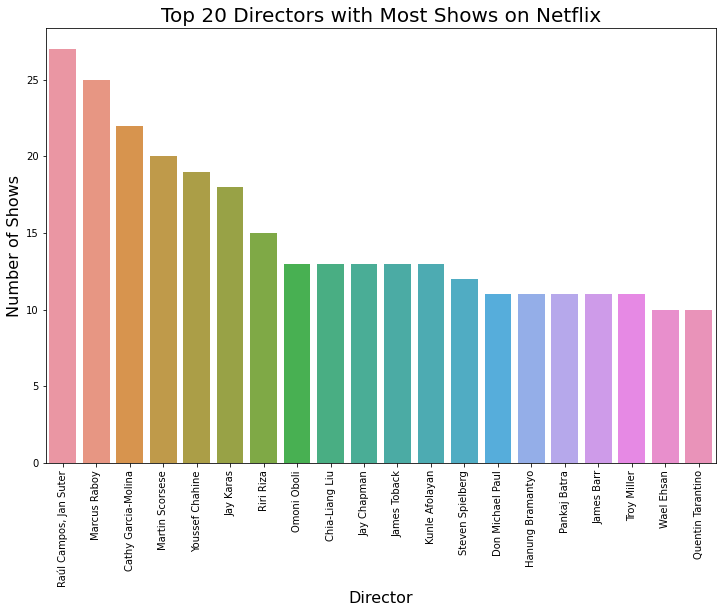

In [22]:
#plotting the graph for top 20 directors
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(data = top_20_directors ,x = "director", y = "number of shows" )
plt.title('Top 20 Directors with Most Shows on Netflix',size = 20)
plt.xlabel('Director',size = 16)
plt.ylabel('Number of Shows',size = 16)

## Top 20 Genres on Netflix

In [23]:
#taking genre column aside and counting the number of occurances
genres = netflix[["genres"]]
genres = netflix[['genres']].value_counts()

#taking top 20 genres 
top_20_genres= genres.head(20).reset_index(name = "number of shows")
top_20_genres

,genres,number of shows
0,Documentaries,334
1,Stand-Up Comedy,321
2,"Dramas, International Movies",320
3,"Comedies, Dramas, International Movies",243
4,"Dramas, Independent Movies, International Movies",215
5,Kids' TV,205
6,Children & Family Movies,177
7,"Documentaries, International Movies",172
8,"Children & Family Movies, Comedies",169
9,"Comedies, International Movies",161


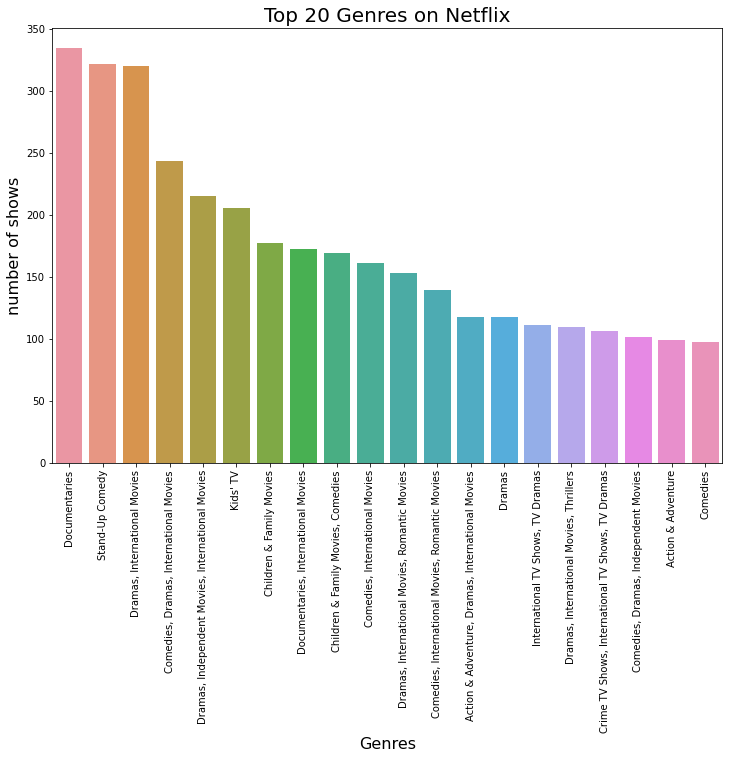

In [27]:
#plotting the graph for top 20 genres
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(data = top_20_genres ,x = "genres", y = "number of shows" )
plt.title('Top 20 Genres on Netflix',size = 20)
plt.xlabel('Genres', size = 16)
plt.ylabel('number of shows', size = 16)
plt.show()

## Top 20 Cast members with most Shows on Netflix

In [28]:
#taking cast column aside and counting the number of occurances
cast_members = netflix[["cast"]]
cast_members = netflix[['cast']].value_counts()

#taking top 20 cast members 
top_20_cast_members= cast_members.head(20).reset_index(name = "number of shows")
top_20_cast_members

,cast,number of shows
0,David Attenborough,19
1,Samuel West,11
2,"Shahid Kapoor, Kareena Kapoor, Om Puri, Neha D...",9
3,Chelsea Handler,8
4,Kevin Hart,7
5,Jeff Dunham,7
6,Craig Sechler,7
7,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",6
8,Bill Burr,5
9,Jason Fox,5


Text(0, 0.5, 'Number of Shows')

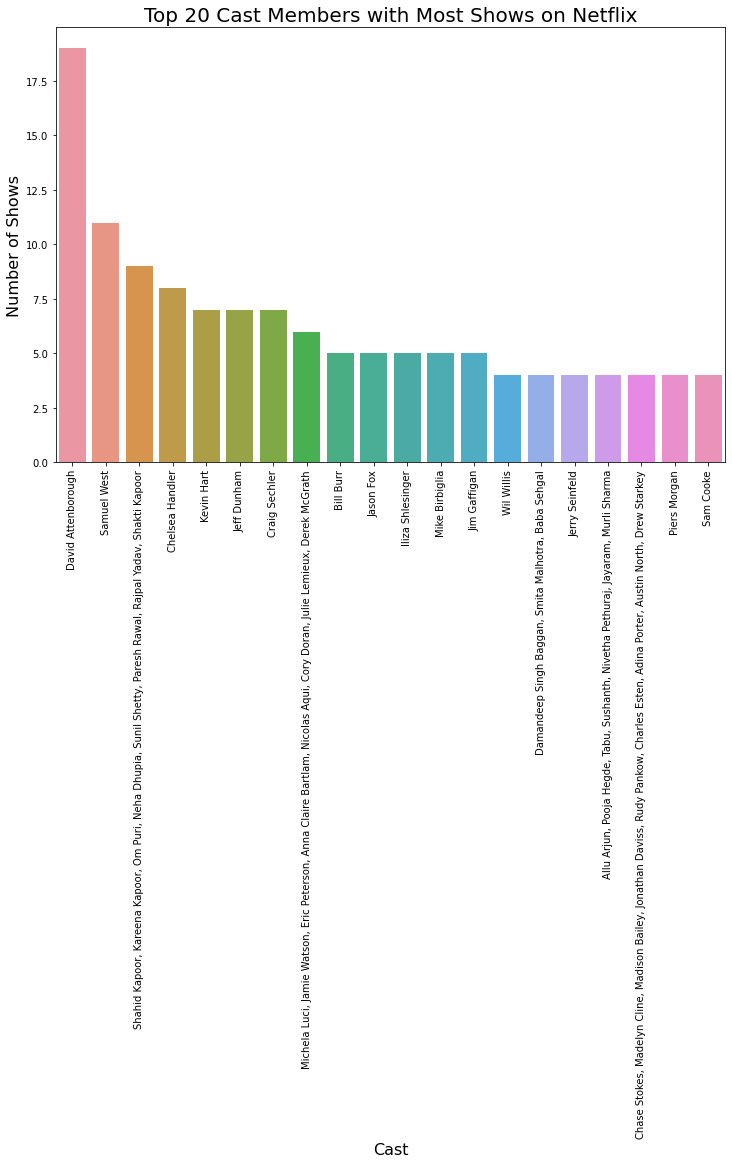

In [29]:
#plotting the graph for top 20 cast_members
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(data = top_20_cast_members ,x = "cast", y = "number of shows" )
plt.title('Top 20 Cast Members with Most Shows on Netflix',size = 20)
plt.xlabel('Cast',size = 16)
plt.ylabel('Number of Shows',size = 16)

## Distribution of Ratings

In [30]:
#taking rating column aside and counting the number of occurances
ratings = netflix[["rating"]].value_counts()
ratings

#converting into a dataframe and assigning column names
rating_count= ratings.reset_index(name = "number of shows")
rating_count

,rating,number of shows
0,TV-MA,2870
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


Text(0, 0.5, 'Number of Shows')

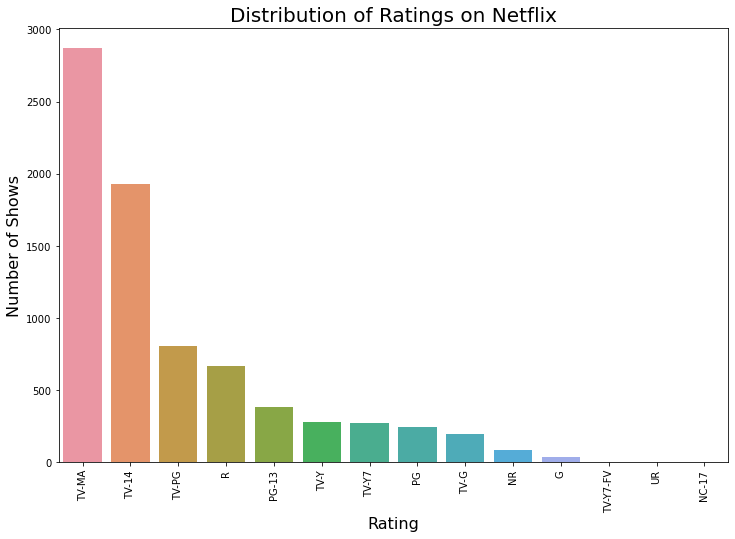

In [31]:
#plotting the graph for ratings
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(data = rating_count ,x = "rating", y = "number of shows" )
plt.title('Distribution of Ratings on Netflix',size = 20)
plt.xlabel('Rating',size = 16)
plt.ylabel('Number of Shows',size = 16)

# Analysis of numerical variables

## number of shows released in each year for last 20 years

In [32]:
# Counting the number of shows released in each year
year = netflix[["release_year"]]
year = netflix[['release_year']].value_counts()

#getting values for last 20 years
year_count= year.head(20).reset_index(name = "number of shows")
year_count

,release_year,number of shows
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868
5,2015,541
6,2014,334
7,2013,267
8,2012,219
9,2010,173


Text(0, 0.5, 'Number of Shows')

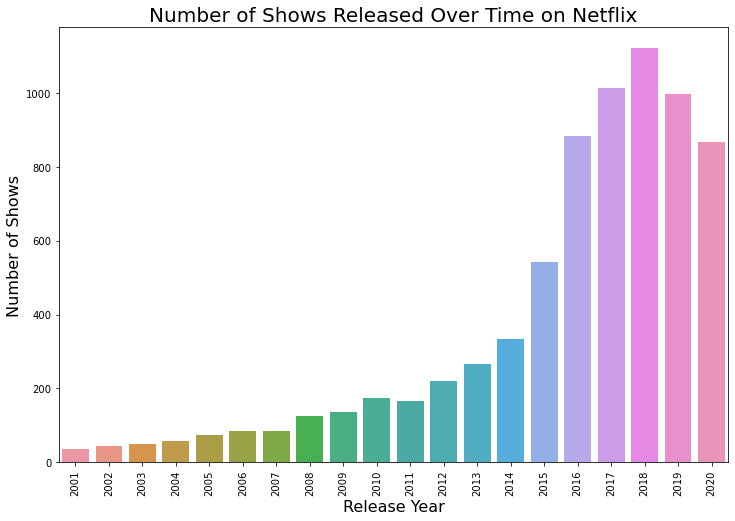

In [33]:
#plotting the graph for release_year
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(data = year_count ,x = "release_year", y = "number of shows" )
plt.title('Number of Shows Released Over Time on Netflix',size = 20)
plt.xlabel('Release Year',size = 16)
plt.ylabel('Number of Shows',size = 16)

## Distribution of Show Durations

In [36]:
#counting the duration of the shows
duration = netflix[["duration"]].value_counts()
duration
# creating a data frame
durations = duration.reset_index(name = "number of shows")
durations

,duration,number of shows
0,1,1608
1,2,382
2,3,185
3,90,136
4,93,131
...,...,...
201,191,1
202,43,1
203,189,1
204,186,1


Text(0, 0.5, 'number of shows')

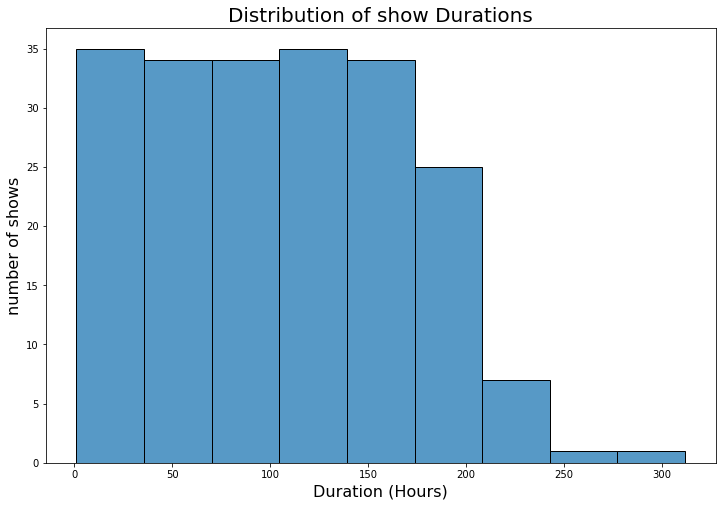

In [42]:
#plotting histogram for show durations
plt.figure(figsize=(12,8))
sns.histplot(x = "duration",data = durations)
plt.title("Distribution of show Durations", size = 20)
plt.xlabel("Duration (Hours)", size = 16)
plt.ylabel("number of shows",size =16 )